In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prometheus_client import values

In [3]:
data = pd.read_csv('googleplaystore_v2.csv')

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.shape

(10841, 13)

In [6]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [8]:
# Number of missing values in data
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
# Handling missing values for ratings
# - Ratings is the target variable.
# - Drop the records would be a good idea

In [10]:
data1 = data[-data.Rating.isnull()]

In [11]:
data1.shape

(9367, 13)

In [12]:
data1.Rating.isnull().sum()

np.int64(0)

In [13]:
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [14]:
# Explor / Understand the nulls for Android version

In [15]:
data1[data1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
# Deciding to drop the record 10472 id

In [17]:
data1.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                         21516.529524
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [18]:
# But using the index is too much of hardcoding. Instead use some qualifiers to get the record

In [19]:
data1[(data1['Android Ver'].isnull()) & (data1.Category == "1.9")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
data1 = data1[~(data1['Android Ver'].isnull() & (data1.Category == "1.9"))]

In [21]:
data1[data1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [22]:
# Find the most common values in Android Version

In [23]:
data1['Android Ver'].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [24]:
data1['Android Ver'].mode()[0]

'4.1 and up'

In [25]:
# Fill the NaN with this value

In [26]:
data1['Android Ver'] = data1['Android Ver'].fillna(data1['Android Ver'].mode()[0])

In [27]:
data1['Android Ver'].value_counts()

Android Ver
4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [28]:
data1['Android Ver'].isnull().sum()

np.int64(0)

In [29]:
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [30]:
data['Current Ver'].value_counts()

Current Ver
Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
1.0.17.3905              1
15.1.2                   1
4.94.19                  1
1.1.11.11                1
2.0.148.0                1
Name: count, Length: 2832, dtype: int64

In [31]:
# Replace the missing value with "Varies with device"

In [32]:
data1['Current Ver'] = data1['Current Ver'].fillna(data1['Current Ver'].mode()[0])

In [33]:
data1['Current Ver'].isnull().sum(0)

np.int64(0)

In [34]:
data1['Current Ver'].value_counts()

Current Ver
Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [35]:
#### Change the variables to the correct types

In [36]:
data1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [37]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [38]:
# Price column

In [39]:
data.Price.value_counts()

Price
0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: count, Length: 93, dtype: int64

In [40]:
# Looks like there is a $ symbol. We need to extract the value after the $ sign. And then convert to float

In [41]:
data1.Price = data1.Price.apply(lambda x: 0 if x =="0" else float(x[1:]))

In [42]:
data1.Price.dtype

dtype('float64')

In [43]:
data1.Price.value_counts()

Price
0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: count, Length: 73, dtype: int64

In [44]:
# Handle the reviews column

In [45]:
data1.Reviews.value_counts()

Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [46]:
data1.Reviews = data1.Reviews.astype("int32")

In [47]:
data1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [48]:
data1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [49]:
data1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [50]:
# handle the installs column. i.e. remove the , and + from string

In [51]:
# data1.Installs = data1.Installs.astype("string")
data1.Installs = data1.Installs.apply(lambda x: float(x.replace(",", "").replace("+", "")))

In [52]:
data1.Installs.dtype

dtype('float64')

In [53]:
# data1.Installs = data1.Installs.astype("int64")

In [54]:
data1.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

In [55]:
# Sanity Checks

In [56]:
# Average rating should be between 1 and 5
data1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [57]:
# Reviews should be less than number of installs
data1[data1.Reviews > data1.Installs].shape

(7, 13)

In [58]:
data1[data1.Reviews > data1.Installs]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1.0,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000.0,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1.0,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5.0,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10.0,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10.0,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1.0,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [59]:
print(data1.Reviews.dtype)
print(data1.Installs.dtype)
# data1.Reviews = data1.Reviews.astype("float64")


int32
float64


In [60]:
data1.Reviews.value_counts()

Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [61]:
data1.Installs.value_counts()

Installs
1.000000e+06    1577
1.000000e+07    1252
1.000000e+05    1150
1.000000e+04    1010
5.000000e+06     752
1.000000e+03     713
5.000000e+05     538
5.000000e+04     467
5.000000e+03     432
1.000000e+08     409
1.000000e+02     309
5.000000e+07     289
5.000000e+02     201
5.000000e+08      72
1.000000e+01      69
1.000000e+09      58
5.000000e+01      56
5.000000e+00       9
1.000000e+00       3
Name: count, dtype: int64

In [62]:
data1[data1.Reviews > data1.Installs]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1.0,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000.0,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1.0,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5.0,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10.0,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10.0,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1.0,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [63]:
data1 = data1[data1.Reviews <= data1.Installs]

In [64]:
# For free apps, price should not be more than 0
data1[(data1.Type == 'Free') & (data1.Price > 0 )]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## Using Box Plots to Identify the outliers and varied data:
- Upper Extreme
- Whisker (between upper extreme and 3rd quartile)
- 3rd Quartile (75th percentile)
- Median
- 1st Quartile (25th percentile)
- Lower Extreme

Q3 - Q1 = Inter Quartile Range (IQR)
Upper Fence = Q3 + 1.5 * IQR
Lower Fence = Q1 - 1.5 * IQR

Outliers = Values outside the range = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

In [65]:
data1.Price.describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [66]:
# Identifying and handling outliers / extreme values

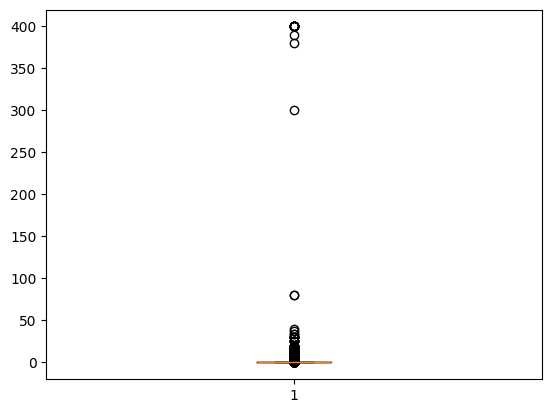

In [67]:
plt.boxplot(data1['Price'])
plt.show()

In [68]:
# Checkout the records where price is more than $200
data1[data1.Price >= 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [69]:
# These are definitely fake apps of some sort
data1 = data1[data1.Price < 200]

In [70]:
data1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

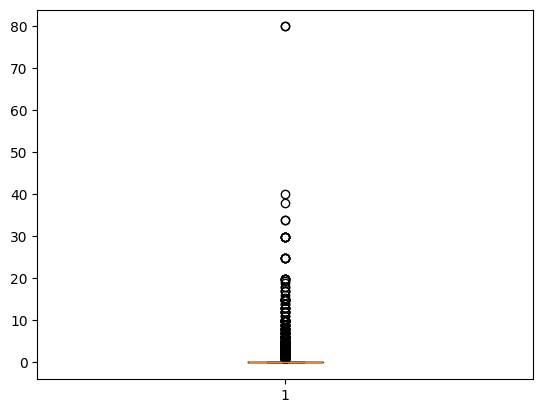

In [71]:
plt.boxplot(data1['Price'])
plt.show()

<Axes: >

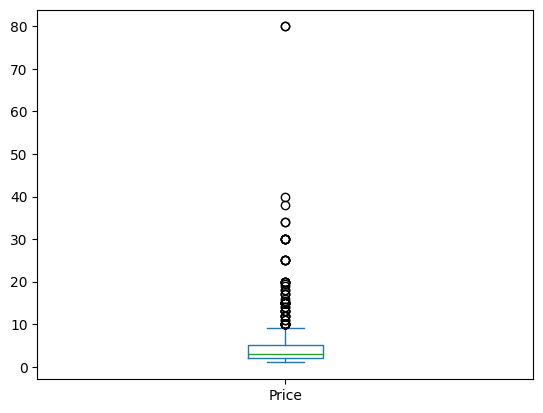

In [72]:
data1[data1.Price > 0].Price.plot.box()

In [73]:
data1[data1.Price >= 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000.0,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000.0,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000.0,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000.0,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100.0,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000.0,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [74]:
data1 = data1[data1.Price < 30]

<Axes: >

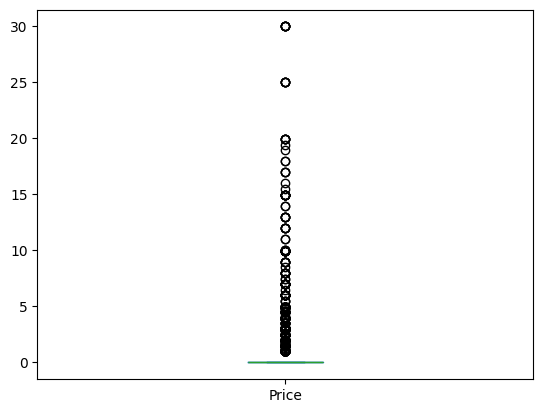

In [75]:
data1.Price.plot.box()

In [76]:
# Using histogram to range numerical values and get the frequency of records in a particular bucket. i.e. which bucket is more prominent (or called as bins)
# x axis has the bins, and the y axis has the frequency

In [77]:
data1.Reviews.describe()

count    9.338000e+03
mean     5.155891e+05
std      3.148627e+06
min      1.000000e+00
25%      1.890000e+02
50%      6.011500e+03
75%      8.247100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [78]:
# Histogram for reviews
# plt.hist()

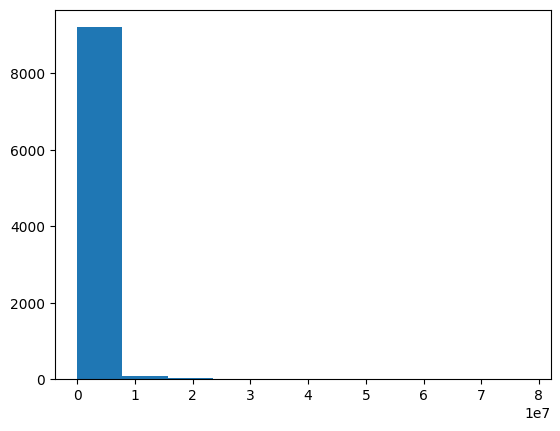

In [79]:
plt.hist(data1['Reviews'])
plt.show()

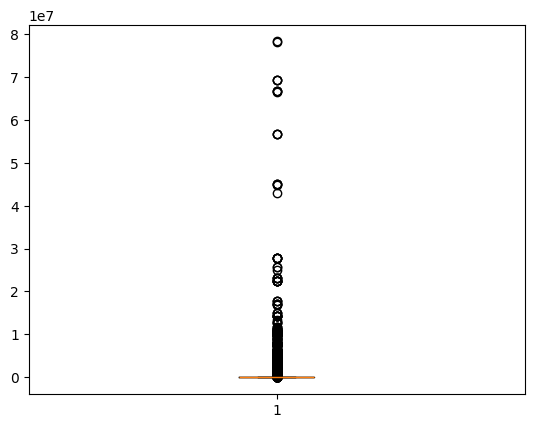

In [80]:
plt.boxplot(data1['Reviews'])
plt.show()

In [81]:
# Checking the records with outlier / great number of reviews
data1[data1.Reviews >= 10000000 ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,5.000000e+08,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,5.000000e+08,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,1.000000e+08,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,5.000000e+08,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,1.000000e+08,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,1.000000e+08,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [82]:
# Drop records having more than 1M reviews

In [83]:
data1 = data1[data1.Reviews <= 1000000]

In [84]:
data1.shape

(8634, 13)

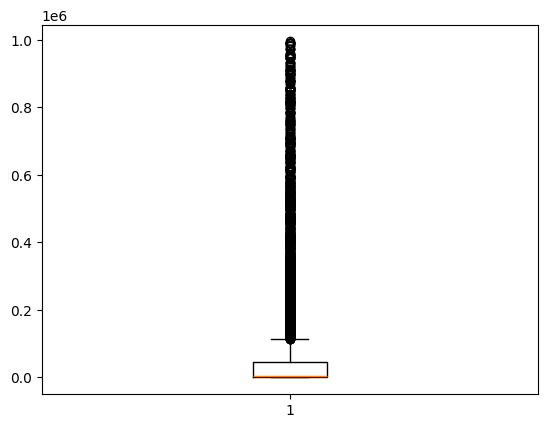

In [85]:
plt.boxplot(data1['Reviews'])
plt.show()

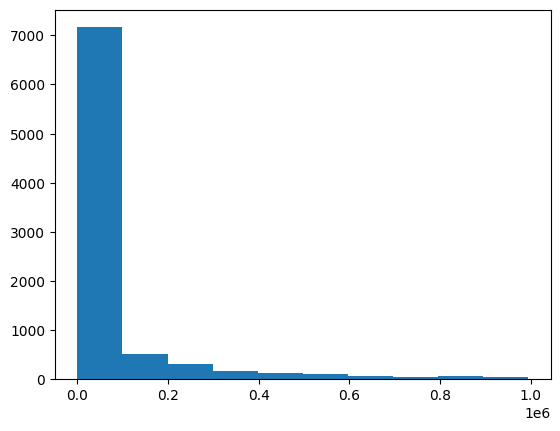

In [86]:
plt.hist(data1['Reviews'])
plt.show()

In [87]:
data1.Installs.describe()

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

(array([3218., 1359., 2229.,  564.,  426.,  271.,  178.,  126.,  106.,
         157.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

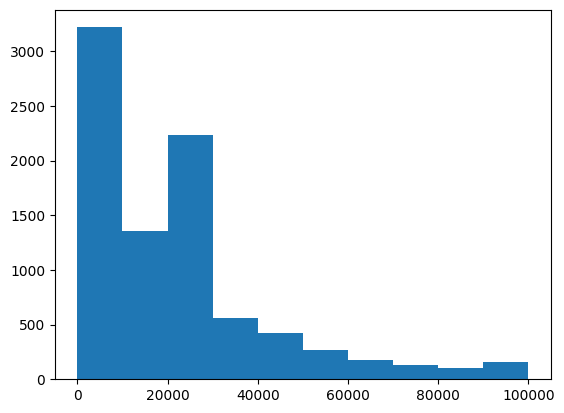

In [88]:
plt.hist(data1['Size'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11eb234f0>,
 'caps': [<matplotlib.lines.Line2D at 0x11eb23a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x11eb23250>],
 'medians': [<matplotlib.lines.Line2D at 0x11eb23f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x11eb39250>],
 'means': []}

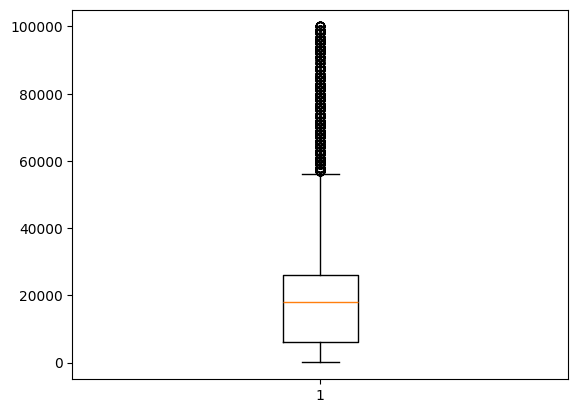

In [89]:
plt.boxplot(data1['Size'])

In [90]:
data1.Size.describe()

count      8634.000000
mean      21636.459060
std       20663.668474
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

In [96]:
data1.Size.median()

np.float64(18000.0)

### This is where SeaBorn lesson starts

In [97]:
import warnings
warnings.filterwarnings('ignore')

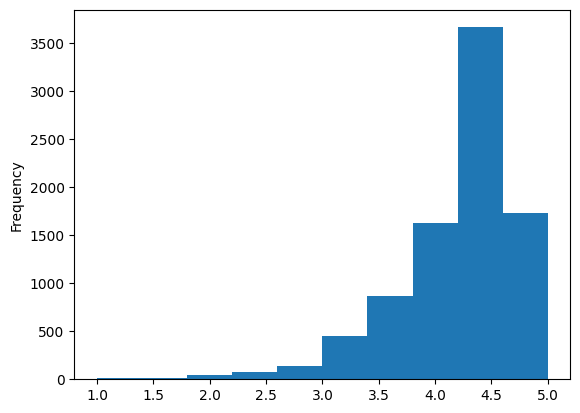

In [102]:
data1.Rating.plot.hist()
plt.show()

In [103]:
import seaborn as sns

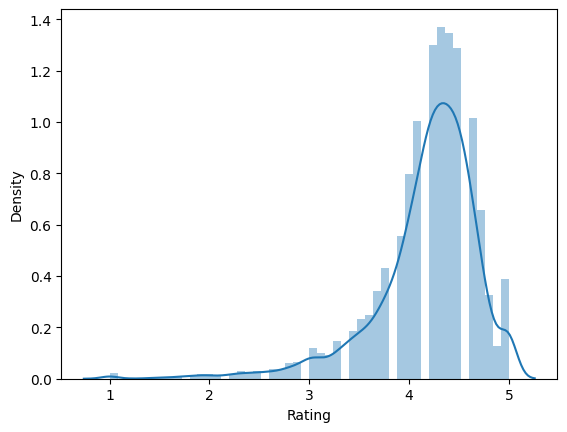

In [107]:
sns.distplot(data1.Rating)
plt.show()

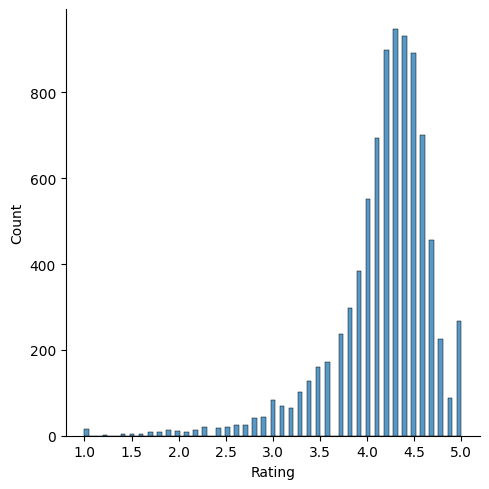

In [109]:
sns.displot(data1.Rating)

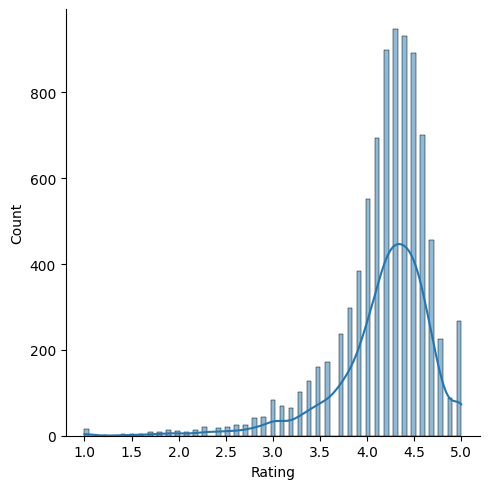

In [110]:
sns.displot(data1.Rating, kde=True)

<Axes: xlabel='Rating'>

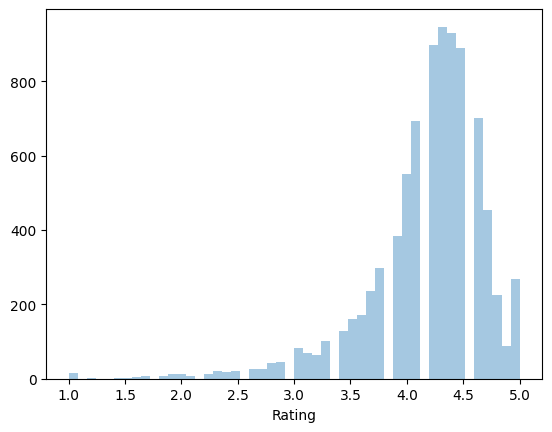

In [117]:
sns.distplot(data1.Rating, kde = False)

In [119]:
# Histogram with limited number of bins -- 20

<Axes: xlabel='Rating', ylabel='Density'>

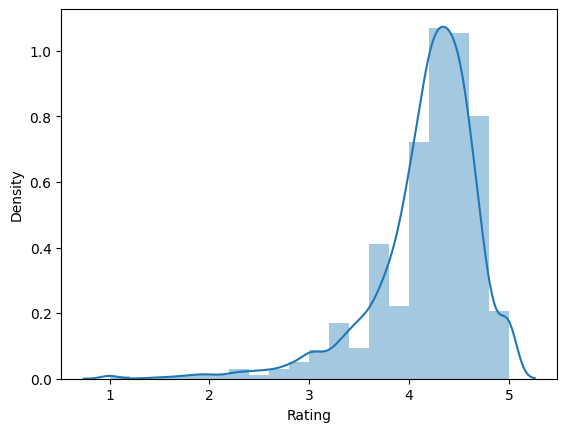

In [120]:
sns.distplot(data1.Rating, bins = 20)

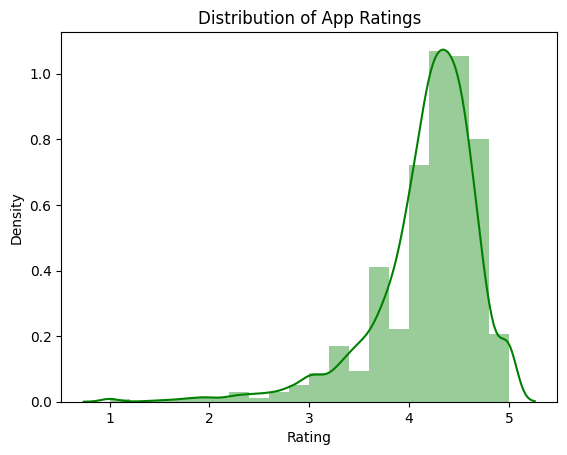

In [134]:
sns.distplot(data1.Rating, bins=20, color='g')
plt.title("Distribution of App Ratings", fontsize=12)
plt.show()

In [135]:
# Use a different style

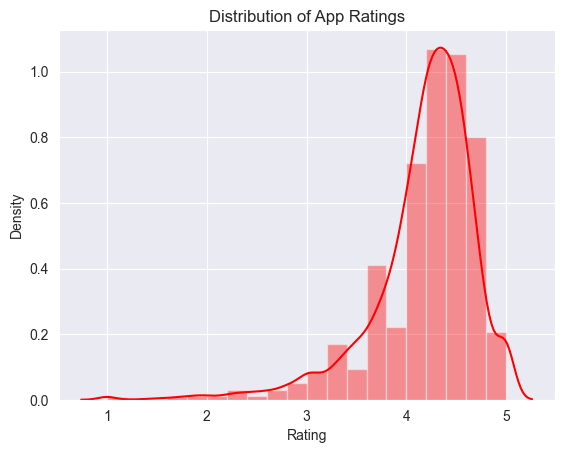

In [144]:
sns.set_style(style='darkgrid')
sns.distplot(data1.Rating, bins=20, color='r')
plt.title("Distribution of App Ratings", fontsize=12)
plt.show()

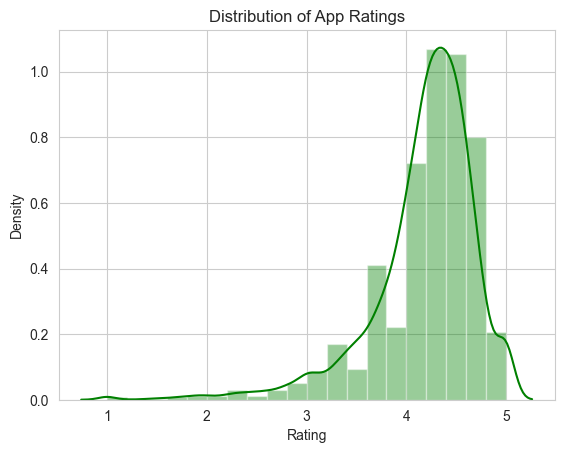

In [147]:
sns.set_style(style='whitegrid')
sns.distplot(data1.Rating, bins=20, color='g')
plt.title("Distribution of App Ratings", fontsize=12)
plt.show()

In [148]:
# Matplotlib themes / styles

In [149]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [156]:
plt.style.use('dark_background')

<Axes: xlabel='Rating', ylabel='Density'>

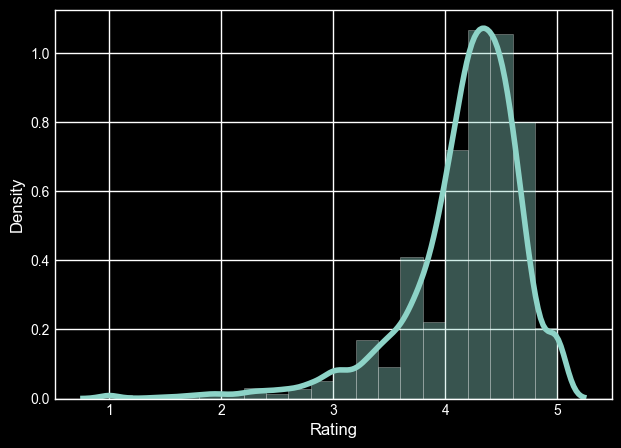

In [157]:
sns.distplot(data1.Rating, bins=20)

In [159]:
plt.style.use('default')

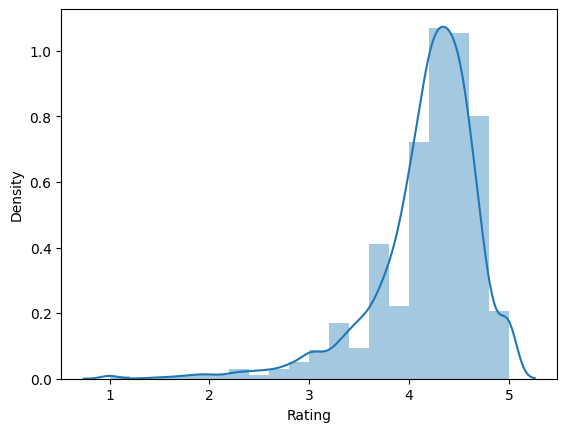

In [161]:
sns.distplot(data1.Rating, bins=20)
plt.show()

In [162]:
# Categorical Columns -- Content Rating

In [163]:
data1['Content Rating'].value_counts()

Content Rating
Everyone           6943
Teen                933
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [167]:
data1 = data1[~data1['Content Rating'].isin(["Adults only 18+", "Unrated"])]

In [168]:
data1.shape

(8630, 13)

In [169]:
data1.reset_index(inplace=True, drop=True)

In [170]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8630 non-null   object 
 1   Category        8630 non-null   object 
 2   Rating          8630 non-null   float64
 3   Reviews         8630 non-null   int32  
 4   Size            8630 non-null   float64
 5   Installs        8630 non-null   float64
 6   Type            8630 non-null   object 
 7   Price           8630 non-null   float64
 8   Content Rating  8630 non-null   object 
 9   Genres          8630 non-null   object 
 10  Last Updated    8630 non-null   object 
 11  Current Ver     8630 non-null   object 
 12  Android Ver     8630 non-null   object 
dtypes: float64(4), int32(1), object(8)
memory usage: 842.9+ KB


In [172]:
data1['Content Rating'].value_counts()

Content Rating
Everyone        6943
Teen             933
Mature 17+       417
Everyone 10+     337
Name: count, dtype: int64

In [173]:
# Pie Chart / Donut Chart

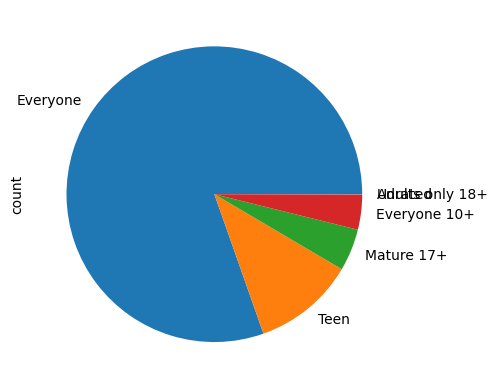

In [175]:
data['Content Rating'].value_counts().plot.pie()
plt.show()

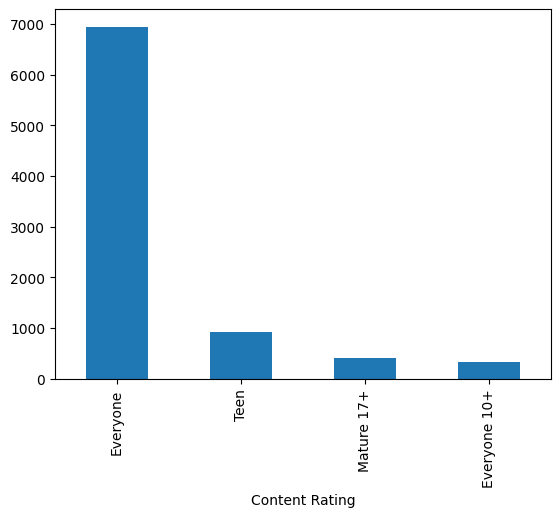

In [180]:
data1['Content Rating'].value_counts().plot.bar()
plt.show()

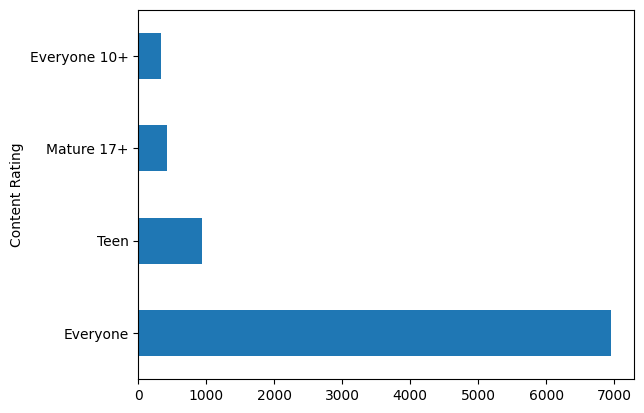

In [181]:
data1['Content Rating'].value_counts().plot.barh()
plt.show()

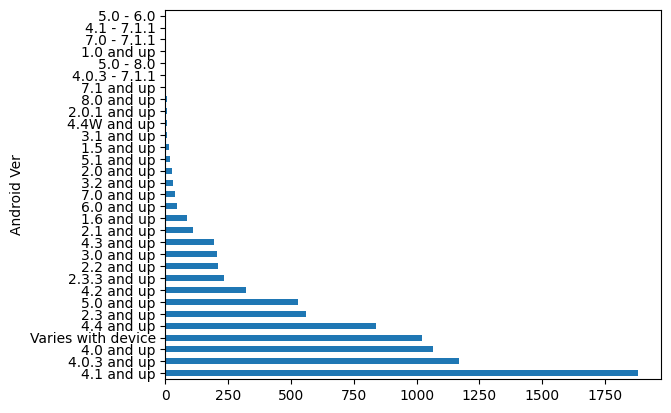

In [182]:
data1['Android Ver'].value_counts().plot.barh()
plt.show()

In [183]:
# Scatter Plot

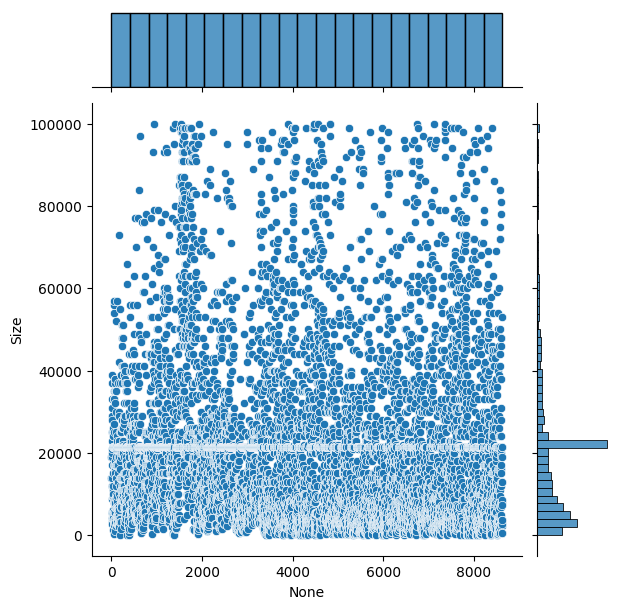

In [188]:
sns.jointplot(data1.Size)
plt.show()

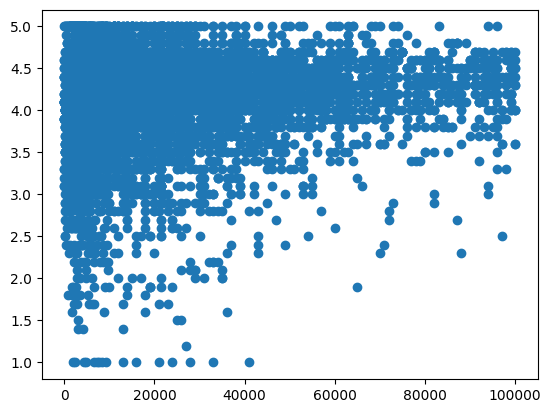

In [189]:
plt.scatter(data1.Size, data1.Rating)
plt.show()

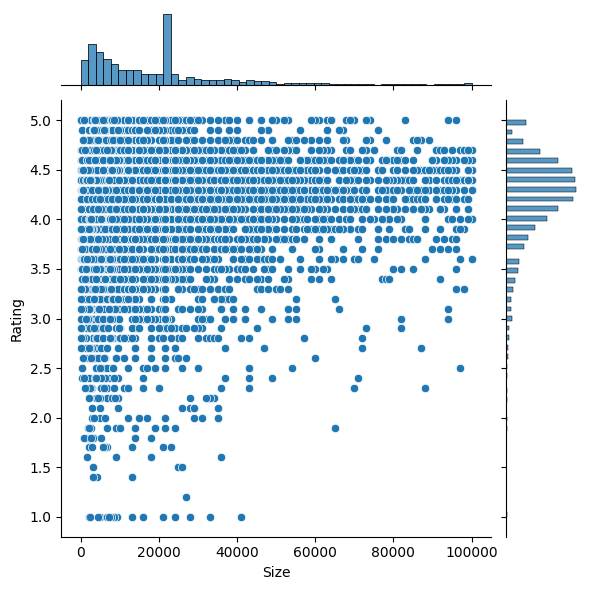

In [191]:
sns.jointplot(x = 'Size', y = 'Rating', data = data1)
plt.show()

In [192]:
# Ratings vs Price

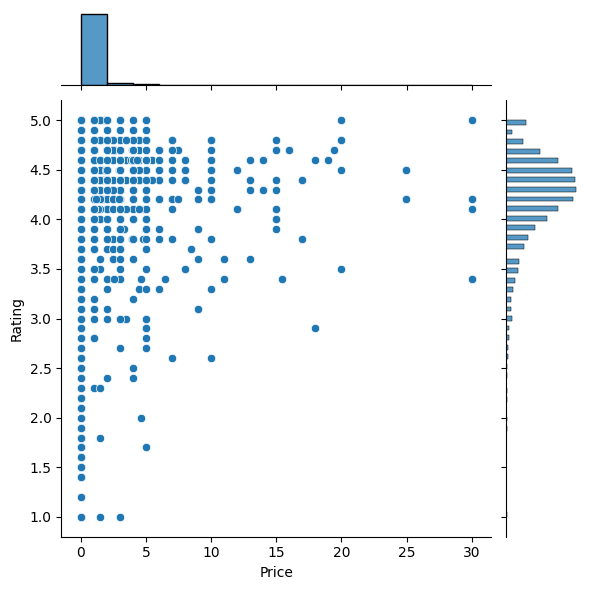

In [194]:
sns.jointplot(x = 'Price', y = 'Rating', data = data1)
plt.show()

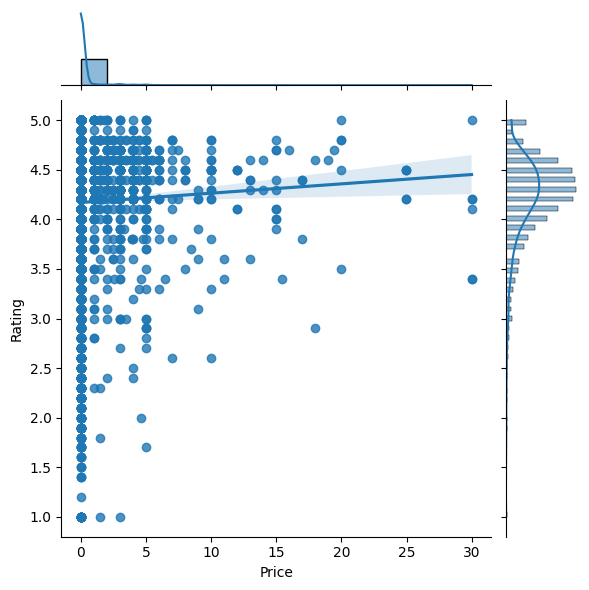

In [195]:
sns.jointplot(x = 'Price', y = 'Rating', data = data1, kind = 'reg')
plt.show()

In [197]:
# sns.jointplot(x = 'Price', y = 'Rating', data = data1, kind = 'hex')
# plt.show()

In [198]:
# Looking at all numerical columns together in a pairplot

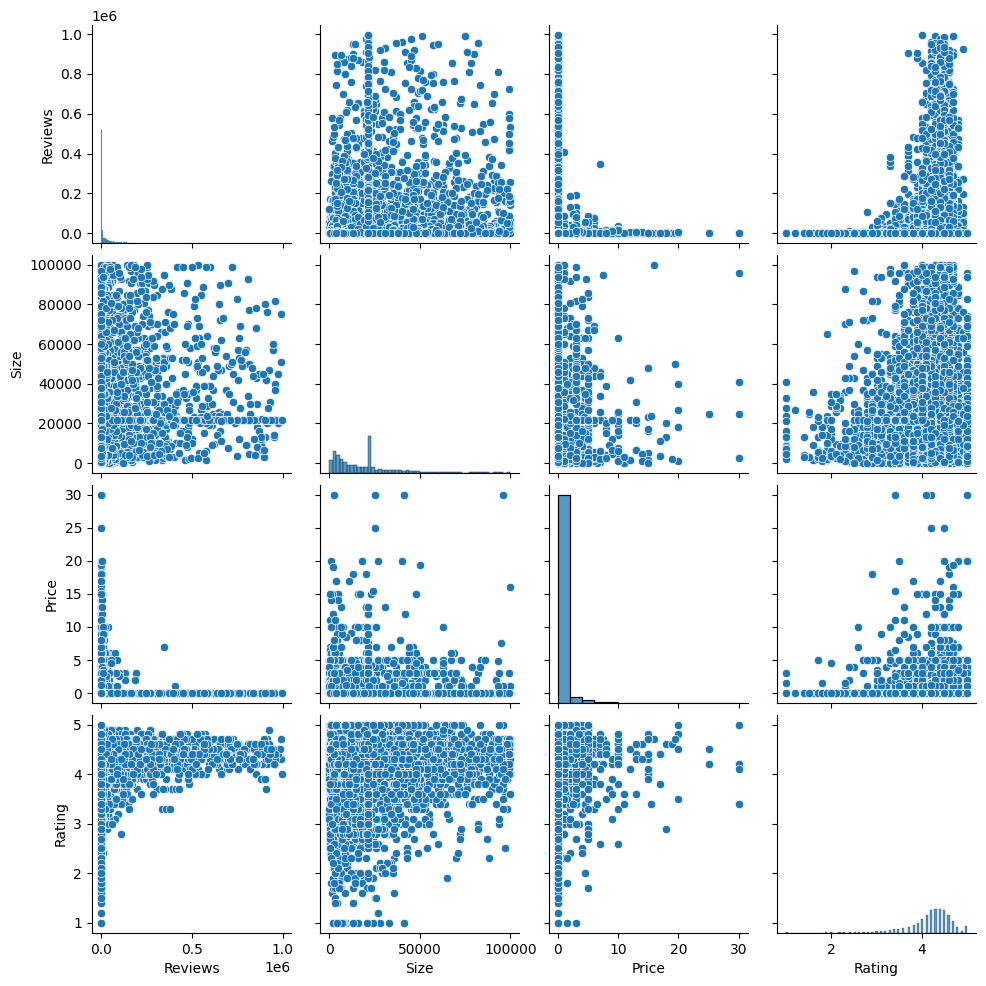

In [201]:
sns.pairplot(data1[['Reviews', 'Size', 'Price', 'Rating']])
plt.show()

In [202]:
# Association between numerical and character data

In [203]:
# Eg: Content Rating vs Rating

In [204]:
data1.groupby(['Content Rating'])['Rating'].mean()

Content Rating
Everyone        4.171108
Everyone 10+    4.217211
Mature 17+      4.099760
Teen            4.198821
Name: Rating, dtype: float64

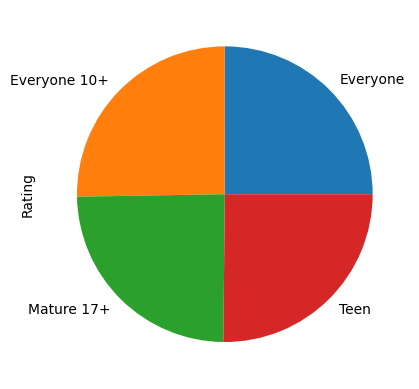

In [207]:
data1.groupby(['Content Rating'])['Rating'].mean().plot.pie()
plt.show()

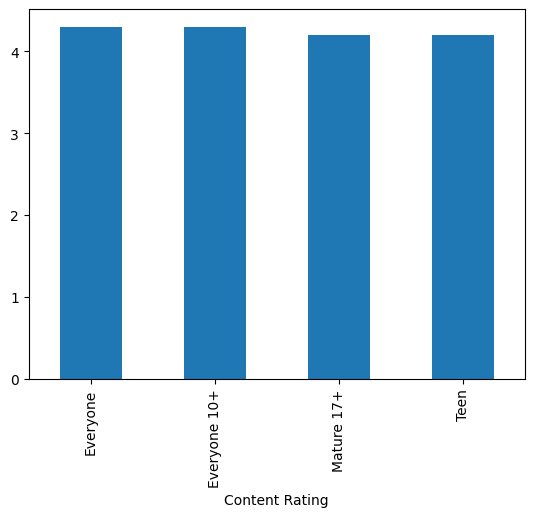

In [209]:
data1.groupby(['Content Rating'])['Rating'].median().plot.bar()
plt.show()

In [210]:
# Using mean vs median -- both are same. So maybe need custom calculation

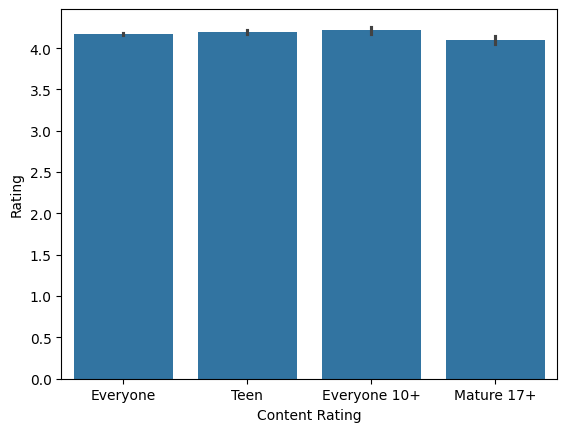

In [212]:
# Takes the average in aggregation.
sns.barplot(x = 'Content Rating', y = 'Rating', data = data1)
plt.show()

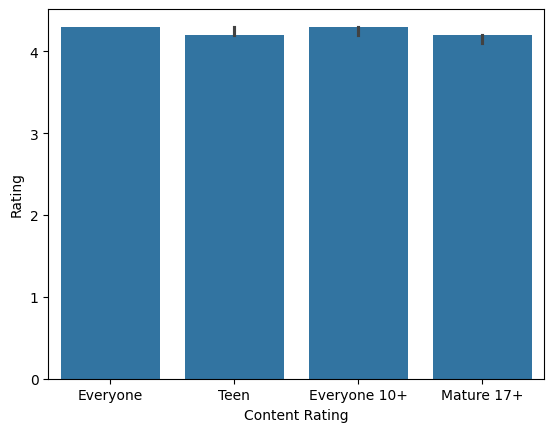

In [214]:
# In order to calculate by median
sns.barplot(x = 'Content Rating', y = 'Rating', data = data1, estimator=np.median)
plt.show()

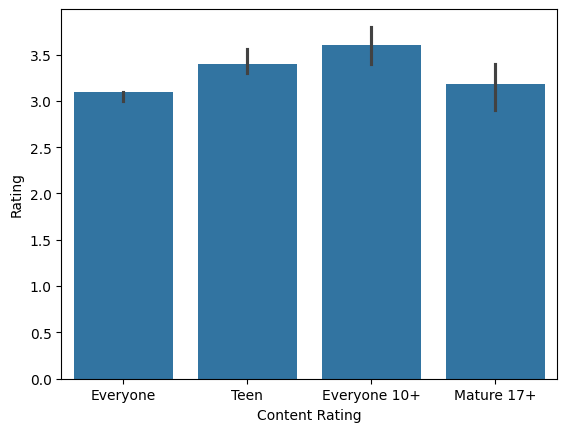

In [217]:
sns.barplot(x = 'Content Rating', y = 'Rating', data = data1, estimator=lambda x: np.quantile(x, 0.05))
plt.show()

# This is showing 5th percentile. i.e lowest and so on

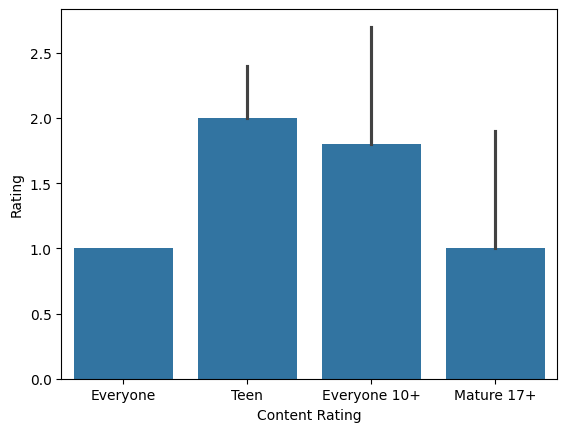

In [219]:
sns.barplot(x = 'Content Rating', y = 'Rating', data = data1, estimator=np.min)
plt.show()

In [220]:
# Box plot of rating for each category

<Axes: xlabel='Content Rating', ylabel='Rating'>

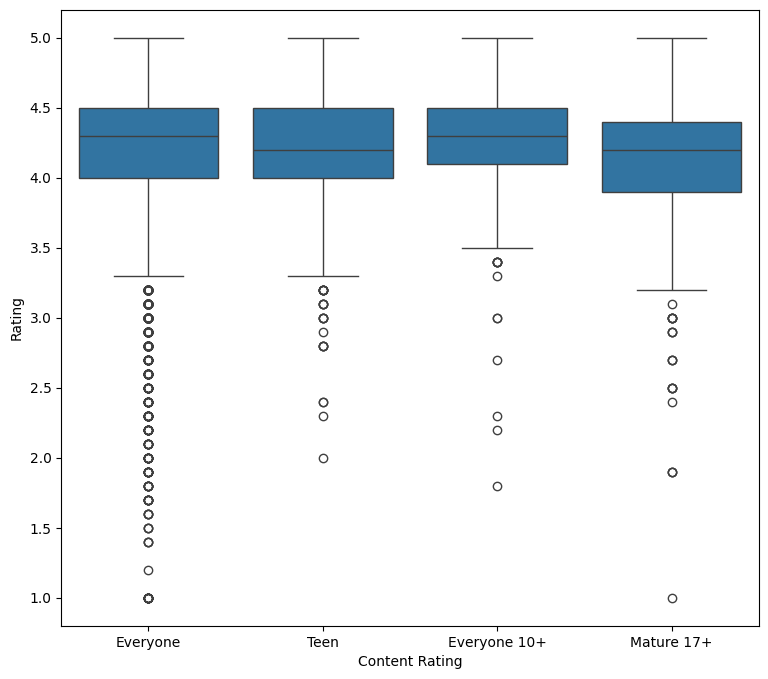

In [223]:
plt.figure(figsize=(9, 8))
sns.boxplot(x = 'Content Rating', y = 'Rating', data = data1)

In [224]:
# Size and Reviews interact -- using heatmap / Ratings, Size, Content Rating

In [225]:
# Rating vs Size vs Content Rating

In [230]:
data1['Size_Bucket'] = pd.qcut(data1.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL", "L", "M", "H", "VH"])

In [231]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [234]:
pd.pivot_table(data=data1, index=['Content Rating'], columns=['Size_Bucket'], values='Rating', aggfunc=np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


In [236]:
pd.pivot_table(data=data1, index=['Content Rating'], columns=['Size_Bucket'], values='Rating', aggfunc=lambda x: np.quantile(x, 0.2))

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


In [237]:
result_grid = pd.pivot_table(data=data1, index=['Content Rating'], columns=['Size_Bucket'], values='Rating', aggfunc=lambda x: np.quantile(x, 0.2))

<Axes: xlabel='Size_Bucket', ylabel='Content Rating'>

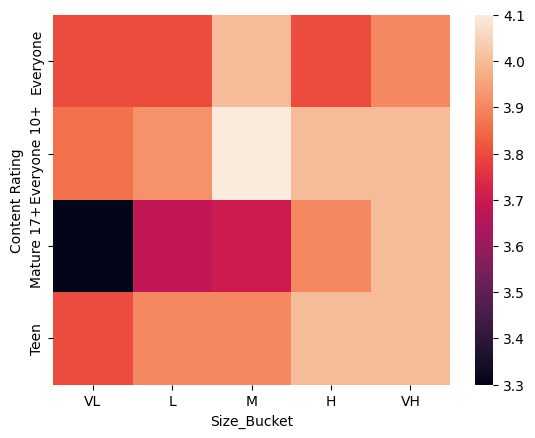

In [238]:
sns.heatmap(result_grid)

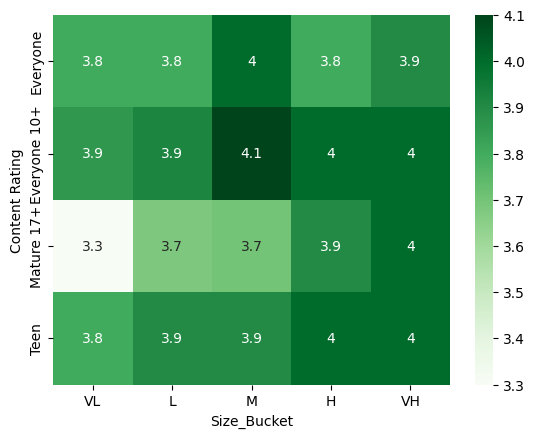

In [242]:
sns.heatmap(result_grid, annot=True, cmap="Greens")
plt.show()

In [243]:
# Time view of things -- Month by month perhaps! Analysis of the Ratings

In [244]:
data1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs           float64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
dtype: object

In [245]:
data1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [247]:
data1['updated_month'] = pd.to_datetime(data1['Last Updated']).dt.month

In [248]:
data1.groupby(['updated_month'])['Rating'].mean()

updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153308
6     4.172590
7     4.222999
8     4.269286
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

<Axes: xlabel='updated_month'>

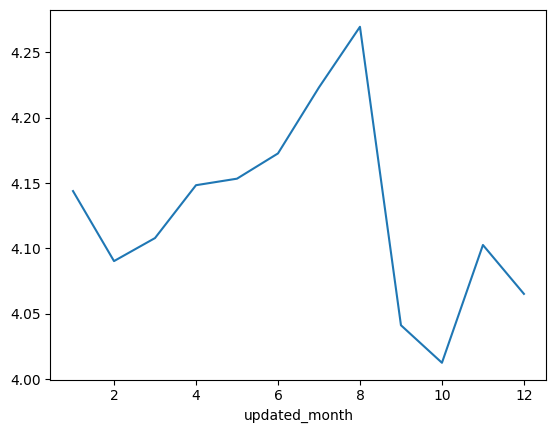

In [249]:
data1.groupby(['updated_month'])['Rating'].mean().plot()

In [252]:
monthly = pd.pivot_table(data=data1, values="Installs", index=['updated_month'], columns="Content Rating", aggfunc=sum)

<Axes: xlabel='updated_month'>

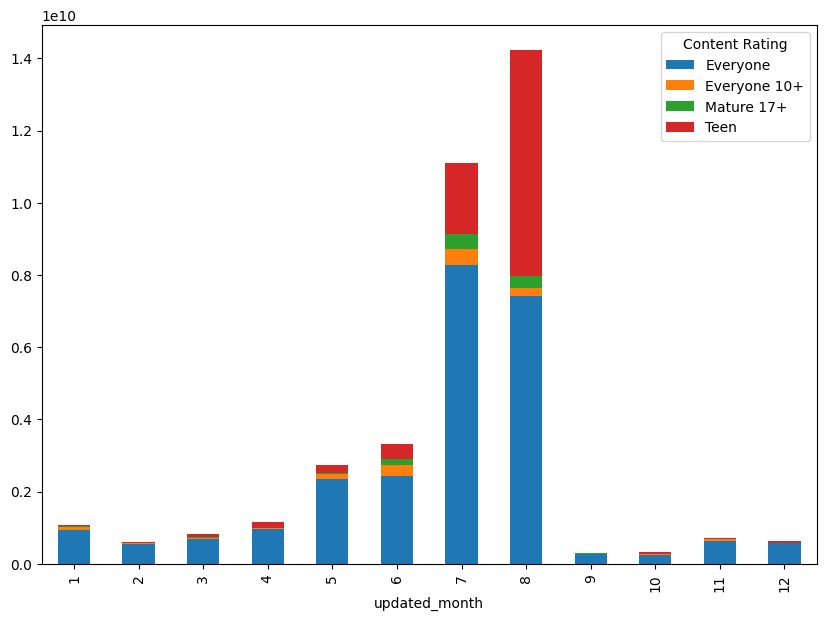

In [258]:
monthly.plot(stacked=True, kind='bar', figsize=(10, 7))

In [259]:
# Get proportions instead of absolute values

In [263]:
monthly_perc = monthly[["Everyone", "Everyone 10+", "Mature 17+", "Teen"]].apply(lambda x: x/x.sum(), axis=1)

<Axes: xlabel='updated_month'>

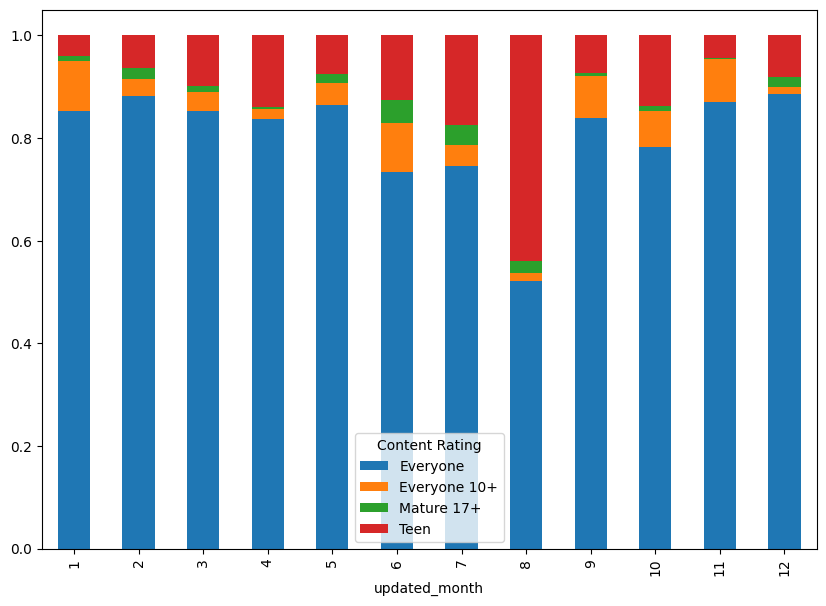

In [265]:
monthly_perc.plot(kind='bar', figsize=(10, 7), stacked=True)

##### Plotly for graphs

In [272]:
result = data1.groupby(['updated_month'])[['Rating']].mean()

In [273]:
type(result)

pandas.core.frame.DataFrame

In [274]:
result.reset_index(inplace=True)

In [275]:
result.head()

,updated_month,Rating
0,1,4.143842
1,2,4.090385
2,3,4.107963
3,4,4.148326
4,5,4.153308


In [277]:
import plotly.express as px

In [286]:
px.line(result, x="updated_month", y="Rating", title="Monthly Rating Distribution")